In [86]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [87]:
# Save the filtered dataset to a CSV file
football_data = pd.read_csv('football_data.csv')

In [88]:
football_data.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,original_rating,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
0,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DC,Dragos Grigore,WhoScored,0,6.56,0,0,0,0,0,0,0,0,0,34,20,5,0,0,5,1,0,2,0,3,11,0,0,8,0,3,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,1.071429,0.143055,0.603571,0.304348,0.000000,0.00,0,1,0,90,90
1,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,Sub,Sub,Anthony Martial,WhoScored,0,6.19,0,0,1,0,0,1,1,0,0,10,3,1,0,0,0,0,2,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.428571,0.051556,0.524845,0.041096,0.166667,0.00,1,0,1,13,90
2,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,MF,DMC,Mihai Pintilii,WhoScored,0,6.58,0,0,0,1,0,1,2,0,0,60,31,9,0,0,4,5,5,6,1,1,14,4,1,4,0,7,3,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1.571429,0.333284,0.710084,0.347826,0.675075,0.00,0,1,0,90,90
3,Euro 2016,10/06/2016,"France - Romania, 2 - 1",France,FW,FW,Olivier Giroud,WhoScored,0,7.34,1,0,2,2,0,3,0,0,0,47,11,10,1,1,0,0,1,5,11,3,18,1,1,1,0,0,0,0,0,1,1,0,0,1,3,0,0,0,0,0,0,0,1.428571,0.316015,0.754464,0.315068,1.090213,0.05,1,0,1,90,90
4,Euro 2016,10/06/2016,"France - Romania, 2 - 1",Romania,DF,DL,Razvan Rat,WhoScored,0,6.38,0,0,0,1,1,0,0,0,0,80,31,15,3,0,13,9,2,3,4,1,21,1,1,1,0,2,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1.500000,0.321679,0.754464,0.478261,0.000000,0.00,0,1,0,90,90


In [89]:
football_data['date'] = pd.to_datetime(football_data['date'], format='%d/%m/%Y')

In [90]:
df_defenders = football_data[football_data['pos'] == 'DF']

In [91]:
df_defenders.dtypes

competition                       object
date                      datetime64[ns]
match                             object
team                              object
pos                               object
pos_role                          object
player                            object
rater                             object
is_human                           int64
original_rating                  float64
goals                              int64
assists                            int64
shots_ontarget                     int64
shots_offtarget                    int64
shotsblocked                       int64
chances2score                      int64
drib_success                       int64
drib_unsuccess                     int64
keypasses                          int64
touches                            int64
passes_acc                         int64
passes_inacc                       int64
crosses_acc                        int64
crosses_inacc                      int64
lballs_acc      

In [92]:
# lets move towards splitting the data.

# get the locations
df_defenders_y = df_defenders['original_rating']
df_defenders_X = df_defenders.drop(columns=['original_rating'], axis=1)

In [93]:
#splitting the X to train,val and test
import pandas as pd
from sklearn.model_selection import train_test_split
player_train_val, player_test, rating_train_val, rating_test = train_test_split(df_defenders_X, df_defenders_y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
player_train, player_val, rating_train, rating_val = train_test_split(player_train_val, rating_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(player_train)}")
print(f"Validation set size: {len(player_val)}")
print(f"Test set size: {len(player_test)}")

Training set size: 3538
Validation set size: 1180
Test set size: 1180


In [94]:
#calling out the one for test
player_test.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
20791,World Cup 2018,2018-06-27,"South Korea - Germany, 2 - 0",South Korea,DF,DR,Lee Yong,WhoScored,0,0,0,0,1,0,0,0,0,0,55,19,8,2,0,5,5,2,2,0,2,19,0,1,5,0,10,1,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1.142857,0.276261,0.603571,0.382979,0.000000,0.0000,1,0,0,90,90
7269,Premier League 2017-18,2017-11-18,"Manchester United - Newcastle United, 4 - 1",Manchester United,DF,DC,Chris Smalling,WhoScored,0,1,0,1,0,0,0,0,0,0,60,49,3,0,0,3,2,1,2,2,1,5,1,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.066667,0.123542,0.622222,0.297872,0.505755,0.0625,1,0,1,90,90
6478,Premier League 2017-18,2017-10-30,"Burnley - Newcastle United, 1 - 0",Burnley,DF,DC,James Tarkowski,WhoScored,0,0,0,1,0,0,1,0,0,1,57,35,6,0,0,5,2,3,3,8,4,6,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1.384615,0.158620,0.692308,0.319444,1.167126,0.0000,1,0,1,90,90
13723,Premier League 2017-18,2018-02-10,"Manchester City - Leicester, 5 - 1",Leicester,DF,DC,Aleksandar Dragovic,WhoScored,0,0,0,0,0,0,0,0,0,0,32,16,4,0,0,0,0,1,2,1,0,5,0,1,3,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.600000,0.103215,0.522667,0.207547,0.000000,0.0000,0,1,0,90,90
19574,Premier League 2017-18,2018-05-13,"Tottenham - Leicester, 5 - 4",Leicester,DF,DR,Danny Simpson,WhoScored,0,0,0,0,0,0,0,0,0,0,25,7,8,0,0,2,4,0,2,1,2,10,1,1,4,1,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.571429,0.116167,0.524845,0.131148,0.000000,0.0000,0,1,0,56,90


In [95]:
player_test_clustering=player_test.copy()

In [96]:
player_train_val_clustering=player_train_val.copy()

In [97]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
player_test_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
20791,World Cup 2018,2018-06-27,"South Korea - Germany, 2 - 0",South Korea,DF,DR,Lee Yong,WhoScored,0,0,0,0,1,0,0,0,0,0,55,19,8,2,0,5,5,2,2,0,2,19,0,1,5,0,10,1,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1.142857,0.276261,0.603571,0.382979,0.000000,0.0000,1,0,0,90,90
7269,Premier League 2017-18,2017-11-18,"Manchester United - Newcastle United, 4 - 1",Manchester United,DF,DC,Chris Smalling,WhoScored,0,1,0,1,0,0,0,0,0,0,60,49,3,0,0,3,2,1,2,2,1,5,1,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.066667,0.123542,0.622222,0.297872,0.505755,0.0625,1,0,1,90,90
6478,Premier League 2017-18,2017-10-30,"Burnley - Newcastle United, 1 - 0",Burnley,DF,DC,James Tarkowski,WhoScored,0,0,0,1,0,0,1,0,0,1,57,35,6,0,0,5,2,3,3,8,4,6,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1.384615,0.158620,0.692308,0.319444,1.167126,0.0000,1,0,1,90,90
13723,Premier League 2017-18,2018-02-10,"Manchester City - Leicester, 5 - 1",Leicester,DF,DC,Aleksandar Dragovic,WhoScored,0,0,0,0,0,0,0,0,0,0,32,16,4,0,0,0,0,1,2,1,0,5,0,1,3,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.600000,0.103215,0.522667,0.207547,0.000000,0.0000,0,1,0,90,90
19574,Premier League 2017-18,2018-05-13,"Tottenham - Leicester, 5 - 4",Leicester,DF,DR,Danny Simpson,WhoScored,0,0,0,0,0,0,0,0,0,0,25,7,8,0,0,2,4,0,2,1,2,10,1,1,4,1,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.571429,0.116167,0.524845,0.131148,0.000000,0.0000,0,1,0,56,90


In [98]:
# Save player name and match date in a separate DataFrame
player_match_info = player_test[['player', 'date','competition']].copy()

In [99]:
player_match_info.head()

,player,date,competition
20791,Lee Yong,2018-06-27,World Cup 2018
7269,Chris Smalling,2017-11-18,Premier League 2017-18
6478,James Tarkowski,2017-10-30,Premier League 2017-18
13723,Aleksandar Dragovic,2018-02-10,Premier League 2017-18
19574,Danny Simpson,2018-05-13,Premier League 2017-18


## Preprocesing the test set

In [100]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saves_otb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_test= player_test.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
20791 2018-06-27       DR      0        0               0                1   
7269  2017-11-18       DC      1        0               1                0   
6478  2017-10-30       DC      0        0               1                0   
13723 2018-02-10       DC      0        0               0                0   
19574 2018-05-13       DR      0        0               0                0   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
20791             0              0             0               0          0   
7269              0              0             0               0          0   
6478              0              1             0               0          1   
13723             0              0             0               0          0   
19574             0              0             0               0          0   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [101]:
#preprocessig
player_test['date'] = pd.to_datetime(player_test['date'], errors='coerce')

# Check for any NaT values
if player_test['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_test['year'] = player_test['date'].dt.year
player_test['month'] = player_test['date'].dt.month
player_test['day'] = player_test['date'].dt.day

# Drop the original 'date' column
player_test = player_test.drop(columns=['date'])

# Display the DataFrame
print(player_test.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
20791       DR      0        0               0                1             0   
7269        DC      1        0               1                0             0   
6478        DC      0        0               1                0             0   
13723       DC      0        0               0                0             0   
19574       DR      0        0               0                0             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
20791              0             0               0          0       55   
7269               0             0               0          0       60   
6478               1             0               0          1       57   
13723              0             0               0          0       32   
19574              0             0               0          0       25   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [102]:
player_test.head()

,pos_role,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration,year,month,day
20791,DR,0,0,0,1,0,0,0,0,0,55,19,8,2,0,5,5,2,2,0,2,19,0,1,5,0,10,1,0,0,0,0,0,1,4,0,0,0,1.142857,0.276261,0.603571,0.382979,0.000000,0.0000,90,90,2018,6,27
7269,DC,1,0,1,0,0,0,0,0,0,60,49,3,0,0,3,2,1,2,2,1,5,1,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,1.066667,0.123542,0.622222,0.297872,0.505755,0.0625,90,90,2017,11,18
6478,DC,0,0,1,0,0,1,0,0,1,57,35,6,0,0,5,2,3,3,8,4,6,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1.384615,0.158620,0.692308,0.319444,1.167126,0.0000,90,90,2017,10,30
13723,DC,0,0,0,0,0,0,0,0,0,32,16,4,0,0,0,0,1,2,1,0,5,0,1,3,0,2,3,0,0,0,0,0,0,0,0,0,0,0.600000,0.103215,0.522667,0.207547,0.000000,0.0000,90,90,2018,2,10
19574,DR,0,0,0,0,0,0,0,0,0,25,7,8,0,0,2,4,0,2,1,2,10,1,1,4,1,3,0,0,0,0,0,0,0,2,0,0,0,0.571429,0.116167,0.524845,0.131148,0.000000,0.0000,56,90,2018,5,13


In [103]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_test.select_dtypes(exclude="object").columns
cat_features = player_test.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_test = preprocessor.fit_transform(player_test)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_test= pd.DataFrame(player_test, columns=all_col_names)
print(player_test.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             1.0              0.0           0.0   
1    1.0      0.0             0.0              1.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    0.0      0.0             1.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0       0.000000           0.2             0.0       0.00      0.0   
1       0.333333           0.0             0.0       0.00      0.0   
2       0.333333           0.0             0.0       0.25      0.0   
3       0.000000           0.0             0.0       0.00      0.0   
4       0.000000           0.0             0.0       0.00      0.0   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0         0.0      0.000000     0.325301       0.128378    0.421053   
1         0.0      0.000000 

In [104]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['betweenness2goals', 'crosses_inacc', 'minutesPlayed']

# Remove specified columns from the DataFrame
player_test= player_test.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    0.0      0.0             1.0              0.0           0.0   
1    1.0      0.0             0.0              1.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    0.0      0.0             1.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0       0.000000           0.2             0.0       0.00      0.0   
1       0.333333           0.0             0.0       0.00      0.0   
2       0.333333           0.0             0.0       0.25      0.0   
3       0.000000           0.0             0.0       0.00      0.0   
4       0.000000           0.0             0.0       0.00      0.0   

   passes_acc  passes_inacc  crosses_acc  lballs_acc  lballs_inacc  grduels_w  \
0         0.0      0.000000     0.325301    0.421053      0.333333        0.0   
1       

## processes for the train to use for feature importance

In [105]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saves_otb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_train= player_train.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
3436  2017-09-16       DC      0        0               0                1   
869   2016-06-22       DC      0        0               0                0   
19970 2018-06-18       DL      0        0               0                0   
11809 2018-01-14       DC      0        0               0                0   
2982  2017-09-09       DC      0        0               0                1   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
3436              0              1             0               0          0   
869               0              0             0               0          0   
19970             0              0             0               1          0   
11809             0              0             0               0          0   
2982              0              1             0               0          0   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [106]:
#preprocessig
player_train['date'] = pd.to_datetime(player_train['date'], errors='coerce')

# Check for any NaT values
if player_train['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_train['year'] = player_train['date'].dt.year
player_train['month'] = player_train['date'].dt.month
player_train['day'] = player_train['date'].dt.day

# Drop the original 'date' column
player_train = player_train.drop(columns=['date'])

# Display the DataFrame
print(player_train.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
3436        DC      0        0               0                1             0   
869         DC      0        0               0                0             0   
19970       DL      0        0               0                0             0   
11809       DC      0        0               0                0             0   
2982        DC      0        0               0                1             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
3436               1             0               0          0       77   
869                0             0               0          0       94   
19970              0             0               1          0       56   
11809              0             0               0          0       42   
2982               1             0               0          0       57   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [107]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_train.select_dtypes(exclude="object").columns
cat_features = player_train.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_train = preprocessor.fit_transform(player_train)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_train= pd.DataFrame(player_train, columns=all_col_names)
print(player_train.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    1.0      0.0             0.0              0.0           0.0   
2    0.0      1.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    1.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0            0.0           0.2             0.0       0.25      0.0   
1            0.0           0.0             0.0       0.00      0.0   
2            0.0           0.0             0.0       0.00      0.0   
3            0.0           0.0             0.0       0.00      0.0   
4            0.0           0.2             0.0       0.25      0.0   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0        0.00           0.0     0.403226       0.263473        0.45   
1        0.00           0.0 

In [108]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['betweenness2goals', 'crosses_inacc', 'minutesPlayed']

# Remove specified columns from the DataFrame
player_train= player_train.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    1.0      0.0             0.0              0.0           0.0   
2    0.0      1.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    1.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  \
0            0.0           0.2             0.0       0.25      0.0   
1            0.0           0.0             0.0       0.00      0.0   
2            0.0           0.0             0.0       0.00      0.0   
3            0.0           0.0             0.0       0.00      0.0   
4            0.0           0.2             0.0       0.25      0.0   

   passes_acc  passes_inacc  crosses_acc  lballs_acc  lballs_inacc  grduels_w  \
0        0.00           0.0     0.403226        0.45      0.090909        0.0   
1       

## Preprocessing the train_val set

In [109]:
#drop the single columns
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','player','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saves_otb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_train_val= player_train_val.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val.head())

            date pos_role  goals  assists  shots_ontarget  shots_offtarget  \
16946 2018-04-14       DC      0        0               0                0   
20294 2018-06-22       DC      0        0               0                1   
3105  2017-09-10       DC      0        0               2                2   
4896  2017-10-01       DL      0        0               0                0   
8316  2017-12-02       DC      0        0               0                0   

       shotsblocked  chances2score  drib_success  drib_unsuccess  keypasses  \
16946             0              0             0               0          0   
20294             0              1             0               0          0   
3105              1              3             2               0          0   
4896              0              0             0               1          0   
8316              0              0             0               0          0   

       touches  passes_acc  passes_inacc  crosses_acc  c

In [110]:
#preprocessig
player_train_val['date'] = pd.to_datetime(player_train_val['date'], errors='coerce')

# Check for any NaT values
if player_train_val['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_train_val['year'] = player_train_val['date'].dt.year
player_train_val['month'] = player_train_val['date'].dt.month
player_train_val['day'] = player_train_val['date'].dt.day

# Drop the original 'date' column
player_train_val = player_train_val.drop(columns=['date'])

# Display the DataFrame
print(player_train_val.head())

      pos_role  goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
16946       DC      0        0               0                0             0   
20294       DC      0        0               0                1             0   
3105        DC      0        0               2                2             1   
4896        DL      0        0               0                0             0   
8316        DC      0        0               0                0             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
16946              0             0               0          0       52   
20294              1             0               0          0       65   
3105               3             2               0          0       64   
4896               0             0               1          0       34   
8316               0             0               0          0       46   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_

In [111]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_features = player_train_val.select_dtypes(exclude="object").columns
cat_features = player_train_val.select_dtypes(include="object").columns

numeric_transformer = MinMaxScaler()  
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
player_train_val = preprocessor.fit_transform(player_train_val)
# Get the numerical column names after scaling
num_col_names = num_features

# Get the categorical column names after one hot encoding
cat_col_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine all column names
all_col_names = list(num_col_names) + list(cat_col_names)
player_train_val= pd.DataFrame(player_train_val, columns=all_col_names)
print(player_train_val.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    1.0      0.0             0.0              0.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    0.0      1.0             0.0              0.0           0.0   
4    1.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses   touches  \
0       0.000000           0.0            0.00       0.00  0.000000   
1       0.000000           0.2            0.00       0.25  0.000000   
2       0.666667           0.4            0.25       0.75  0.333333   
3       0.000000           0.0            0.00       0.00  0.000000   
4       0.000000           0.0            0.00       0.00  0.000000   

   passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
0        0.00           0.0     0.268817       0.233533        0.15   
1        0.00         

In [112]:
#removing the higly correlted columns
#List of columns to remove
remove_columns = ['betweenness2goals', 'crosses_inacc', 'minutesPlayed']

# Remove specified columns from the DataFrame
player_train_val= player_train_val.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val.head())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    1.0      0.0             0.0              0.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    0.0      1.0             0.0              0.0           0.0   
4    1.0      0.0             0.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses   touches  \
0       0.000000           0.0            0.00       0.00  0.000000   
1       0.000000           0.2            0.00       0.25  0.000000   
2       0.666667           0.4            0.25       0.75  0.333333   
3       0.000000           0.0            0.00       0.00  0.000000   
4       0.000000           0.0            0.00       0.00  0.000000   

   passes_acc  passes_inacc  crosses_acc  lballs_acc  lballs_inacc  grduels_w  \
0        0.00           0.0     0.268817        0.15           0.0        0.0   
1 

In [113]:
#the features to use for model
fouls
shots_offtarget
crosses_acc
year
tackles
shotsblocked
aerials_l
game_duration
tballs_inacc
missed_penalties
countattack
tballs_acc
offsides
dribbled_past
touches
stop_shots
owngoals
flow_success
closeness_centrality
passes_inacc
clearances
chances2score
flow_centrality
pos_role_DR
lballs_inacc
drib_success
month
grduels_l
poss_lost
ycards  

NameError: name 'fouls' is not defined

In [114]:
import joblib

In [115]:
selected_features =['fouls',
'shots_offtarget',
'crosses_acc',
'year',
'tackles',
'shotsblocked',
'aerials_l',
'game_duration',
'tballs_inacc',
'missed_penalties',
'countattack',
'tballs_acc',
'offsides',
'dribbled_past',
'touches',
'stop_shots',
'owngoals',
'flow_success',
'closeness_centrality',
'passes_inacc',
'clearances',
'chances2score',
'flow_centrality',
'pos_role_DR',
'lballs_inacc',
'drib_success',
'month',
'grduels_l',
'poss_lost',
'ycards'] 
player_test_subset = player_test[selected_features]

In [116]:
player_test_subset.head()

,fouls,shots_offtarget,crosses_acc,year,tackles,shotsblocked,aerials_l,game_duration,tballs_inacc,missed_penalties,countattack,tballs_acc,offsides,dribbled_past,touches,stop_shots,owngoals,flow_success,closeness_centrality,passes_inacc,clearances,chances2score,flow_centrality,pos_role_DR,lballs_inacc,drib_success,month,grduels_l,poss_lost,ycards
0,0.00,0.0,0.325301,0.0,0.357143,0.0,0.166667,0.000000,0.125,0.333333,0.0,0.909091,0.0,0.0,0.0,0.000000,0.571429,0.546353,0.0,0.000000,0.612903,0.000000,0.626039,0.866667,0.333333,0.2,0.711538,0.357143,0.166667,0.0
1,0.10,1.0,0.355422,0.5,0.142857,0.0,0.083333,0.142857,0.125,0.000000,1.0,0.090909,0.0,0.0,0.0,0.166667,0.000000,0.244325,0.0,0.000000,0.161290,0.333333,0.581717,0.566667,0.000000,0.0,0.711538,0.214286,0.166667,0.0
2,0.40,0.0,0.337349,0.0,0.071429,0.0,0.250000,0.329670,0.125,0.000000,1.0,0.000000,0.0,0.2,0.0,0.166667,0.000000,0.313698,0.0,0.333333,0.193548,0.333333,0.766674,0.966667,0.000000,0.0,0.711538,0.357143,0.250000,0.0
3,0.05,0.0,0.186747,0.0,0.214286,0.0,0.083333,0.000000,0.375,0.000000,0.0,0.181818,0.0,0.0,0.0,0.000000,0.000000,0.204124,0.0,0.000000,0.161290,0.000000,0.310249,0.300000,0.000000,0.0,0.711538,0.000000,0.166667,0.0
4,0.05,0.0,0.144578,0.0,0.285714,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.272727,0.0,0.2,0.0,0.166667,0.285714,0.229740,0.0,0.000000,0.322581,0.000000,0.293629,0.400000,0.000000,0.0,0.384615,0.142857,0.166667,0.0


In [95]:
defender_model = joblib.load("Voting_regressor_lr_model.pkl")

In [96]:
import pandas as pd


# Make predictions on the test data
xgb_predictions = goalkeeper_model.predict(player_test_subset)

# Round the predictions to one decimal place
xgb_predictions_rounded = [round(pred, 1) for pred in xgb_predictions]

# Create a DataFrame with the rounded predictions
predictions_df = pd.DataFrame(xgb_predictions_rounded, columns=['Predicted_Ratings'])

# If you have identifiers for the players in the test set, you can add them to the DataFrame
# Assuming player_ids is a list or array containing the identifiers for player_test_subset
# player_ids = ...

# Adding identifiers to the DataFrame
# predictions_df['Player_ID'] = player_ids

print(predictions_df)

     Predicted_Ratings
0                  6.0
1                  6.1
2                  7.7
3                  7.2
4                  6.5
5                  7.3
6                  6.5
7                  6.7
8                  7.6
9                  7.1
10                 7.3
11                 7.4
12                 7.2
13                 6.1
14                 7.0
15                 8.3
16                 6.7
17                 8.1
18                 6.4
19                 6.2
20                 6.6
21                 7.0
22                 8.2
23                 7.1
24                 8.1
25                 5.6
26                 6.2
27                 8.2
28                 7.9
29                 6.7
30                 6.7
31                 6.1
32                 7.3
33                 6.9
34                 7.4
35                 6.7
36                 6.4
37                 6.9
38                 5.3
39                 5.2
40                 7.3
41                 8.4
42         

In [97]:
# Concatenate the DataFrames along the columns
# Make sure all DataFrames have the same number of rows
combined_test_df = pd.concat([player_match_info.reset_index(drop=True), 
                         predictions_df.reset_index(drop=True), 
                         rating_test.reset_index(drop=True)], axis=1)

print(combined_test_df)

                      player       date             competition  \
0                 Ben Foster 2018-03-31  Premier League 2017-18   
1             Heurelho Gomes 2017-12-02  Premier League 2017-18   
2           Orestis Karnezis 2018-01-31  Premier League 2017-18   
3                Marwin Hitz 2018-04-22      Bundesliga 2017-18   
4                 Bernd Leno 2017-09-17      Bundesliga 2017-18   
5               Jack Butland 2018-03-17  Premier League 2017-18   
6               Manuel Neuer 2016-06-16               Euro 2016   
7                   Joe Hart 2017-09-30  Premier League 2017-18   
8               David Ospina 2018-06-28          World Cup 2018   
9          Kasper Schmeichel 2017-11-28  Premier League 2017-18   
10          Andreas Isaksson 2016-06-22               Euro 2016   
11               Yann Sommer 2017-11-25      Bundesliga 2017-18   
12          Lukasz Fabianski 2016-06-21               Euro 2016   
13            Florian Muller 2018-03-09      Bundesliga 2017-1

In [98]:
combined_test_df.head()

,player,date,competition,Predicted_Ratings,original_rating
0,Ben Foster,2018-03-31,Premier League 2017-18,6.0,5.78
1,Heurelho Gomes,2017-12-02,Premier League 2017-18,6.1,6.13
2,Orestis Karnezis,2018-01-31,Premier League 2017-18,7.7,7.61
3,Marwin Hitz,2018-04-22,Bundesliga 2017-18,7.2,7.28
4,Bernd Leno,2017-09-17,Bundesliga 2017-18,6.5,6.73


In [99]:
# Calculate total predicted ratings and number of matches played for each player
player_stats = combined_test_df.groupby(['player']).agg({
    'Predicted_Ratings': ['sum', 'count']
}).reset_index()

# Rename columns
player_stats.columns = ['player', 'total_predicted_rating', 'matches_played']

# Calculate weighted average predicted ratings
player_stats['weighted_avg_predicted_rating'] = player_stats['total_predicted_rating'] / player_stats['matches_played']

# Rank players based on weighted average predicted ratings
player_stats['weighted_avg_predicted_rank'] = player_stats['weighted_avg_predicted_rating'].rank(ascending=False)

# Sort by rank in ascending order
player_stats_sorted = player_stats.sort_values(by='weighted_avg_predicted_rank')

# Display the DataFrame
print(player_stats_sorted.head(20))
print(player_stats_sorted.tail(20))

                     player  total_predicted_rating  matches_played  \
25          Guillermo Ochoa                    16.1               2   
17          Eldin Jakupovic                     8.0               1   
26  Hannes Thor Halldorsson                    15.4               2   
21           Florian Muller                    15.2               2   
13             David Ospina                     7.6               1   
53            Pedro Gallese                     7.5               1   
4          Andreas Isaksson                     7.3               1   
47                 Mat Ryan                    21.9               3   
57            Ralf Fahrmann                    50.9               7   
0                    Adrian                     7.2               1   
46              Marwin Hitz                    50.1               7   
59            Robert Elliot                    14.3               2   
63        Ron-Robert Zieler                    57.1               8   
56    

In [100]:
# Display the DataFrame
print(player_stats_sorted.head(20))

                     player  total_predicted_rating  matches_played  \
25          Guillermo Ochoa                    16.1               2   
17          Eldin Jakupovic                     8.0               1   
26  Hannes Thor Halldorsson                    15.4               2   
21           Florian Muller                    15.2               2   
13             David Ospina                     7.6               1   
53            Pedro Gallese                     7.5               1   
4          Andreas Isaksson                     7.3               1   
47                 Mat Ryan                    21.9               3   
57            Ralf Fahrmann                    50.9               7   
0                    Adrian                     7.2               1   
46              Marwin Hitz                    50.1               7   
59            Robert Elliot                    14.3               2   
63        Ron-Robert Zieler                    57.1               8   
56    

In [101]:
# Display the DataFrame
print(player_stats_sorted.tail(20))

                 player  total_predicted_rating  matches_played  \
61        Robin Zentner                    19.3               3   
54        Peter Gulacsi                    32.1               5   
6         Asmir Begovic                    44.9               7   
22        Franco Armani                     6.4               1   
49     Michael McGovern                     6.4               1   
41         Loris Karius                    25.6               4   
9            Bernd Leno                    57.2               9   
2    Alexander Schwolow                    44.3               7   
42       Lukas Hradecky                    37.4               6   
12      Darren Randolph                    18.7               3   
32             Joe Hart                    31.1               5   
48        Michael Esser                    12.4               2   
73      Willy Caballero                     6.2               1   
20     Fernando Muslera                    12.4               

In [51]:
# Calculate total original ratings and number of matches played for each player
player_stats = combined_test_df.groupby(['player']).agg({
    'original_rating': ['sum', 'count']
}).reset_index()

# Rename columns
player_stats.columns = ['player', 'total_original_rating', 'matches_played']

# Calculate weighted average predicted ratings
player_stats['weighted_avg_original_rating'] = player_stats['total_original_rating'] / player_stats['matches_played']

# Rank players based on weighted average predicted ratings
player_stats['weighted_avg_original_rank'] = player_stats['weighted_avg_original_rating'].rank(ascending=False)

# Sort by rank in ascending order
player_stats_sorted = player_stats.sort_values(by='weighted_avg_original_rank')

In [52]:
# Display the DataFrame
print(player_stats_sorted.head(20))

                     player  total_original_rating  matches_played  \
17          Eldin Jakupovic                   8.22               1   
25          Guillermo Ochoa                  16.19               2   
4          Andreas Isaksson                   7.78               1   
24             Gabor Kiraly                   7.68               1   
13             David Ospina                   7.64               1   
26  Hannes Thor Halldorsson                  14.86               2   
59            Robert Elliot                  14.72               2   
0                    Adrian                   7.29               1   
21           Florian Muller                  14.54               2   
57            Ralf Fahrmann                  50.83               7   
53            Pedro Gallese                   7.23               1   
46              Marwin Hitz                  50.54               7   
47                 Mat Ryan                  21.53               3   
60              Robi

In [53]:
# Display the DataFrame
print(player_stats_sorted.tail(20))

                 player  total_original_rating  matches_played  \
9            Bernd Leno                  57.46               9   
65        Rune Jarstein                  38.08               6   
2    Alexander Schwolow                  44.23               7   
1         Alex McCarthy                  37.70               6   
54        Peter Gulacsi                  31.33               5   
75           Yvon Mvogo                   6.25               1   
42       Lukas Hradecky                  37.48               6   
61        Robin Zentner                  18.72               3   
34      Jordan Pickford                  49.77               8   
48        Michael Esser                  12.40               2   
32             Joe Hart                  30.98               5   
12      Darren Randolph                  18.56               3   
19  Farouk Ben Mustapha                   6.14               1   
49     Michael McGovern                   6.07               1   
36       J

# using clustering method for the ranking

# using all features with average performances

In [46]:
player_train_val_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
16946,Bundesliga 2017-18,2018-04-14,"VfB Stuttgart - Hannover 96, 1 - 1",Hannover 96,DF,DC,Salif Sane,WhoScored,0,0,0,0,0,0,0,0,0,0,52,40,3,0,0,6,2,0,2,2,1,8,0,0,2,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.200000,0.303513,0.622222,0.353659,0.000000,0.0,0,0,0,90,90
20294,World Cup 2018,2018-06-22,"Nigeria - Iceland, 2 - 0",Nigeria,DF,DC,Leon Balogun,WhoScored,0,0,0,0,1,0,1,0,0,0,65,47,6,0,0,1,3,5,1,0,2,11,0,0,3,0,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.428571,0.198602,0.710084,0.438356,1.685849,0.0,1,0,0,90,90
3105,Premier League 2017-18,2017-09-10,"Burnley - Crystal Palace, 1 - 0",Crystal Palace,DF,DC,Scott Dann,WhoScored,0,0,0,2,2,1,3,2,0,0,64,42,5,0,0,2,3,3,3,3,1,10,1,1,2,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.615385,0.261663,0.738462,0.352273,1.517264,0.0,0,1,0,90,90
4896,Premier League 2017-18,2017-10-01,"Newcastle United - Liverpool, 1 - 1",Newcastle United,DF,DL,Javier Manquillo,WhoScored,0,0,0,0,0,0,0,0,1,0,34,10,8,0,0,1,4,0,3,2,2,10,1,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.120452,0.592982,0.237288,0.594238,0.0,0,0,1,90,90
8316,Bundesliga 2017-18,2017-12-02,"Mainz 05 - Augsburg, 1 - 3",Augsburg,DF,DC,Martin Hinteregger,WhoScored,0,0,0,0,0,0,0,0,0,0,46,26,6,0,0,11,5,2,2,3,3,9,0,2,4,2,4,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1.066667,0.126033,0.544444,0.306667,1.468320,0.0,1,0,0,90,90


In [47]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saves_otb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_train_val_clustering= player_train_val_clustering.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val_clustering.head())

            date pos_role              player  goals  assists  shots_ontarget  \
16946 2018-04-14       DC          Salif Sane      0        0               0   
20294 2018-06-22       DC        Leon Balogun      0        0               0   
3105  2017-09-10       DC          Scott Dann      0        0               2   
4896  2017-10-01       DL    Javier Manquillo      0        0               0   
8316  2017-12-02       DC  Martin Hinteregger      0        0               0   

       shots_offtarget  shotsblocked  chances2score  drib_success  \
16946                0             0              0             0   
20294                1             0              1             0   
3105                 2             1              3             2   
4896                 0             0              0             0   
8316                 0             0              0             0   

       drib_unsuccess  keypasses  touches  passes_acc  passes_inacc  \
16946               0      

In [48]:
player_train_val_clustering.head()

,date,pos_role,player,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration
16946,2018-04-14,DC,Salif Sane,0,0,0,0,0,0,0,0,0,52,40,3,0,0,6,2,0,2,2,1,8,0,0,2,2,4,0,1,0,0,0,0,0,0,0,0,0,1.200000,0.303513,0.622222,0.353659,0.000000,0.0,90,90
20294,2018-06-22,DC,Leon Balogun,0,0,0,1,0,1,0,0,0,65,47,6,0,0,1,3,5,1,0,2,11,0,0,3,0,3,4,1,0,0,0,0,0,0,0,0,0,1.428571,0.198602,0.710084,0.438356,1.685849,0.0,90,90
3105,2017-09-10,DC,Scott Dann,0,0,2,2,1,3,2,0,0,64,42,5,0,0,2,3,3,3,3,1,10,1,1,2,0,5,1,0,0,0,0,0,0,0,0,0,0,1.615385,0.261663,0.738462,0.352273,1.517264,0.0,90,90
4896,2017-10-01,DL,Javier Manquillo,0,0,0,0,0,0,0,1,0,34,10,8,0,0,1,4,0,3,2,2,10,1,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,1.000000,0.120452,0.592982,0.237288,0.594238,0.0,90,90
8316,2017-12-02,DC,Martin Hinteregger,0,0,0,0,0,0,0,0,0,46,26,6,0,0,11,5,2,2,3,3,9,0,2,4,2,4,2,0,0,0,0,0,0,3,0,0,0,1.066667,0.126033,0.544444,0.306667,1.468320,0.0,90,90


In [49]:
# Select columns relevant to player performance metrics, excluding 'date' and 'player'
metric_columns = player_train_val_clustering.columns.difference(['date', 'player','pos_role'])

# Identify network metrics columns
network_metrics_columns = [
    'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals','flow_success']

# Identify performance metric columns (excluding network metrics)
performance_metric_columns = metric_columns.difference(network_metrics_columns)

# Display the selected columns
print("Performance metric columns:")
print(performance_metric_columns)
print("Network metric columns:")
print(network_metrics_columns)

Performance metric columns:
Index(['aerials_l', 'aerials_w', 'assists', 'chances2score', 'clearances',
       'countattack', 'crosses_acc', 'crosses_inacc', 'dangmistakes',
       'drib_success', 'drib_unsuccess', 'dribbled_past', 'fouls',
       'game_duration', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'keypasses', 'lballs_acc', 'lballs_inacc', 'minutesPlayed',
       'missed_penalties', 'offsides', 'owngoals', 'passes_acc',
       'passes_inacc', 'poss_lost', 'rcards', 'shots_offtarget',
       'shots_ontarget', 'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc',
       'tballs_inacc', 'touches', 'wasfouled', 'ycards'],
      dtype='object')
Network metric columns:
['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals', 'flow_success']


In [50]:
import pandas as pd

# Assuming player_train_val_clustering is the DataFrame with your data

# Aggregate performance metrics for each player by summing up the values
aggregated_df = player_train_val_clustering.groupby('player')[performance_metric_columns].sum().reset_index()

# Aggregate network metrics for each player by averaging the values
network_aggregated_df = player_train_val_clustering.groupby('player')[network_metrics_columns].mean().reset_index()

# Get the first 'pos' role for each player
pos_role_df = player_train_val_clustering.groupby('player')['pos_role'].first().reset_index()

# Merge aggregated performance metrics, network metrics, and pos role
aggregated_df = pd.merge(aggregated_df, network_aggregated_df, on='player')
aggregated_df = pd.merge(aggregated_df, pos_role_df, on='player')

# Calculate the number of matches played by each player
aggregated_df['matches_played'] = player_train_val_clustering.groupby('player')['date'].count().values

print("Aggregated performance, network metrics, and pos role for each player:")
print(aggregated_df.head())

Aggregated performance, network metrics, and pos role for each player:
              player  aerials_l  aerials_w  assists  chances2score  \
0    Aaron Cresswell         29         30        4              7   
1       Aaron Hughes          1          0        0              0   
2  Aaron Wan-Bissaka          8         10        0              0   
3       Abdou Diallo         36         57        0              8   
4    Abdullahi Shehu          1          0        0              0   

   clearances  countattack  crosses_acc  crosses_inacc  dangmistakes  \
0          43            8           25             53             1   
1           1            0            0              1             0   
2          19            4            5             15             3   
3          35            4           11             11             2   
4           3            0            0              0             0   

   drib_success  drib_unsuccess  dribbled_past  fouls  game_duration  goals

In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played
0,Aaron Cresswell,29,30,4,7,43,8,25,53,1,2,3,11,13,1980,0,53,40,57,8,82,103,1953,0,0,0,719,166,292,0,8,1,3,12,24,3,7,1284,11,4,1.177306,0.189796,0.670878,0.400430,0.008686,1.039314,DC,22
1,Aaron Hughes,1,0,0,0,1,0,0,1,0,0,0,0,0,90,0,2,1,4,0,5,5,90,0,0,0,14,6,10,0,0,0,0,0,1,1,0,31,0,0,0.928571,0.311056,0.635338,0.238095,0.000000,0.699405,DR,1
2,Aaron Wan-Bissaka,8,10,0,0,19,4,5,15,3,9,0,1,2,630,0,32,33,29,2,15,11,628,0,0,0,160,46,102,0,0,0,0,7,18,0,0,412,3,1,0.986996,0.136083,0.648284,0.310637,0.000000,0.540063,DR,7
3,Abdou Diallo,36,57,0,8,35,4,11,11,2,20,10,14,43,1800,2,82,93,52,1,70,78,1786,0,3,0,585,158,228,0,6,3,0,12,55,3,4,1111,5,5,1.169167,0.190235,0.640343,0.370597,0.008505,1.049119,DC,20
4,Abdullahi Shehu,1,0,0,0,3,0,0,0,0,0,1,1,1,90,0,3,1,10,0,2,2,90,0,0,0,33,2,8,0,0,0,0,0,1,0,0,50,1,0,1.076923,0.137320,0.651584,0.352941,0.000000,1.714671,DR,1


In [52]:
# Assuming 'pos_encoded' is the column name for the encoded pos role
# Exclude 'pos_encoded' from the averaging process but still include it in clustering
performance_metric_columns_for_averaging = [col for col in performance_metric_columns if col != 'pos_role']

# Calculate the average performance metrics for each player, excluding 'pos_encoded'
for column in performance_metric_columns_for_averaging:
    aggregated_df[f'average_{column}'] = aggregated_df[column] / aggregated_df['matches_played']

# Select only the average metrics for clustering, plus 'pos_encoded'
average_performance_columns = [f'average_{column}' for column in performance_metric_columns_for_averaging]

# Combine average performance metrics, network metrics, and 'pos_encoded' for clustering
clustering_features = average_performance_columns + network_metrics_columns + ['pos_role']

print("Aggregated DataFrame with average performance metrics, network metrics, and pos role:")
print(aggregated_df[['player'] + clustering_features])


Aggregated DataFrame with average performance metrics, network metrics, and pos role:
                      player  average_aerials_l  average_aerials_w  \
0            Aaron Cresswell           1.318182           1.363636   
1               Aaron Hughes           1.000000           0.000000   
2          Aaron Wan-Bissaka           1.142857           1.428571   
3               Abdou Diallo           1.800000           2.850000   
4            Abdullahi Shehu           1.000000           0.000000   
5              Achraf Hakimi           0.500000           1.500000   
6                  Adam Lang           1.250000           0.500000   
7                 Adam Smith           1.750000           1.000000   
8                  Adil Rami           0.500000           3.500000   
9             Adolfo Machado           2.000000           0.000000   
10           Adrian Mariappa           2.888889           3.555556   
11               Ahmed Fathy           3.000000           1.000000   
12  

In [53]:
# Select features for clustering
features = aggregated_df[clustering_features]

In [54]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,1.318182,1.363636,0.181818,0.318182,1.954545,0.363636,1.136364,2.409091,0.045455,0.090909,0.136364,0.500000,0.590909,90.0,0.0,2.409091,1.818182,2.590909,0.363636,3.727273,4.681818,88.772727,0.0,0.00,0.0,32.681818,7.545455,13.272727,0.0,0.363636,0.045455,0.136364,0.545455,1.090909,0.136364,0.318182,58.363636,0.500000,0.181818,1.177306,0.189796,0.670878,0.400430,0.008686,1.039314,DC
1,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.0,0.0,2.000000,1.000000,4.000000,0.000000,5.000000,5.000000,90.000000,0.0,0.00,0.0,14.000000,6.000000,10.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.928571,0.311056,0.635338,0.238095,0.000000,0.699405,DR
2,1.142857,1.428571,0.000000,0.000000,2.714286,0.571429,0.714286,2.142857,0.428571,1.285714,0.000000,0.142857,0.285714,90.0,0.0,4.571429,4.714286,4.142857,0.285714,2.142857,1.571429,89.714286,0.0,0.00,0.0,22.857143,6.571429,14.571429,0.0,0.000000,0.000000,0.000000,1.000000,2.571429,0.000000,0.000000,58.857143,0.428571,0.142857,0.986996,0.136083,0.648284,0.310637,0.000000,0.540063,DR
3,1.800000,2.850000,0.000000,0.400000,1.750000,0.200000,0.550000,0.550000,0.100000,1.000000,0.500000,0.700000,2.150000,90.0,0.1,4.100000,4.650000,2.600000,0.050000,3.500000,3.900000,89.300000,0.0,0.15,0.0,29.250000,7.900000,11.400000,0.0,0.300000,0.150000,0.000000,0.600000,2.750000,0.150000,0.200000,55.550000,0.250000,0.250000,1.169167,0.190235,0.640343,0.370597,0.008505,1.049119,DC
4,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,90.0,0.0,3.000000,1.000000,10.000000,0.000000,2.000000,2.000000,90.000000,0.0,0.00,0.0,33.000000,2.000000,8.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,50.000000,1.000000,0.000000,1.076923,0.137320,0.651584,0.352941,0.000000,1.714671,DR


In [55]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-hot encode 'pos_role'
one_hot_encoder = OneHotEncoder(sparse_output=False)
pos_role_encoded = one_hot_encoder.fit_transform(features[['pos_role']])

# Create a DataFrame with the encoded 'pos_role'
pos_role_encoded_df = pd.DataFrame(pos_role_encoded, columns=one_hot_encoder.get_feature_names_out(['pos_role']))

# Drop the original 'pos_role' column from the features DataFrame
features_without_pos_role = features.drop(columns=['pos_role'])

# Apply Min-Max scaling to the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_without_pos_role)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_without_pos_role.columns)

# Combine the scaled features with the one-hot encoded 'pos_role'
features_scaled = pd.concat([scaled_features_df, pos_role_encoded_df], axis=1)

# Show the final DataFrame with scaled features and one-hot encoded 'pos_role'
print("Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':")
print(features_scaled.head())


Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':
   average_aerials_l  average_aerials_w  average_assists  \
0           0.164773           0.143541         0.181818   
1           0.125000           0.000000         0.000000   
2           0.142857           0.150376         0.000000   
3           0.225000           0.300000         0.000000   
4           0.125000           0.000000         0.000000   

   average_chances2score  average_clearances  average_countattack  \
0               0.159091            0.244318             0.045455   
1               0.000000            0.125000             0.000000   
2               0.000000            0.339286             0.071429   
3               0.200000            0.218750             0.025000   
4               0.000000            0.375000             0.000000   

   average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
0             0.227273               0.344156              0.015152   
1    

In [56]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components as needed
X_pca = pca.fit_transform(features_scaled)

print("\nPCA-transformed DataFrame:")
print(X_pca)


PCA-transformed DataFrame:
[[ 0.4443858   0.00930928]
 [-0.49502752 -0.68102221]
 [-0.66142187 -0.69823067]
 ...
 [-0.71426094  0.72478141]
 [-0.60966546  0.70771837]
 [ 0.62914607  0.00237313]]


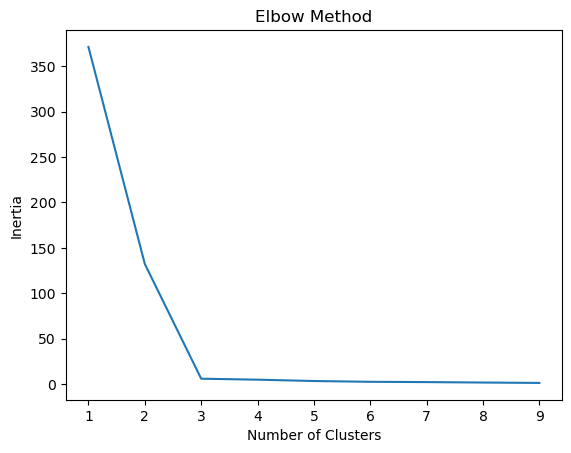

In [57]:
#uisng the elbow method to find the best k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitting KMeans models starting from k=1 to k=10
kmeans_models = [KMeans(n_clusters=k).fit(X_pca) for k in range(1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

# Plotting the inertia values as a function of k
plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'encoded_cluster_df' is your DataFrame containing the data

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over the range of k values from 3 to 7
for k in range(2, 10):  # Note that the upper limit in range() is exclusive, so use 8 to include 7
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Print the silhouette score for the current k
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.7224
Silhouette Score for k=3: 0.9204
Silhouette Score for k=4: 0.8323
Silhouette Score for k=5: 0.7401
Silhouette Score for k=6: 0.7452
Silhouette Score for k=7: 0.5170
Silhouette Score for k=8: 0.5033
Silhouette Score for k=9: 0.4947


In [59]:
from sklearn.cluster import KMeans

# Assuming 'encoded_cluster_df' is your DataFrame containing the data
k_values = [2, 3, 8]
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)  # Fitting the model to find centroids
    labels = kmeans.predict(X_pca)  # Predicting the cluster labels based on the fitted model
    cluster_labels[k] = labels

# Print labels for one of the k values
print("Labels for k=2:", cluster_labels[3])

Labels for k=2: [0 2 2 0 2 1 0 2 0 2 0 2 0 1 2 1 0 0 1 0 1 0 0 0 1 2 0 0 2 0 0 1 2 0 1 0 1
 0 2 1 1 0 1 2 0 1 2 1 1 1 0 0 0 0 1 2 0 2 2 2 1 2 2 0 0 0 0 0 1 0 2 0 1 1
 1 0 1 2 1 0 1 1 0 0 0 0 0 0 2 1 1 0 0 2 1 2 2 1 2 1 2 2 2 2 0 1 1 0 0 0 2
 0 0 0 1 2 0 1 2 1 0 0 0 1 0 0 0 2 2 2 1 0 1 2 1 2 1 0 1 0 1 0 2 1 0 0 2 0
 1 0 0 0 1 2 0 2 0 0 0 2 1 0 0 0 0 0 1 1 0 0 0 2 2 0 2 1 2 0 2 0 0 2 0 2 2
 0 1 1 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 2 1 0 1 1 0
 2 0 1 0 0 0 0 1 1 2 0 2 0 1 0 1 0 0 0 1 2 2 1 2 0 1 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 2 2 0 2 1 0 1 0 0 2 2 2 0 2 0 2 0 2 0 0 2 1 0 0 0 0 0 1 1 2 2 1
 2 2 2 2 1 1 0 0 0 0 0 2 0 0 1 2 1 0 1 0 1 0 0 2 0 1 2 0 2 1 0 0 1 1 2 0 0
 2 1 2 2 0 1 2 1 0 0 0 0 0 2 0 0 1 1 1 2 2 0 0 2 1 2 0 2 0 0 2 2 2 2 1 0 0
 2 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 2 2 1 2 1 1 1 0 2 2 2 0 0 2 2 0
 0 0 0 1 0 0 2 0 0 0 2 0 0 2 1 0 1 2 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 0
 0 1 0 2 0 1 1 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 1 0 1 0 0 1 1 0 2 0
 0 0 2 2 

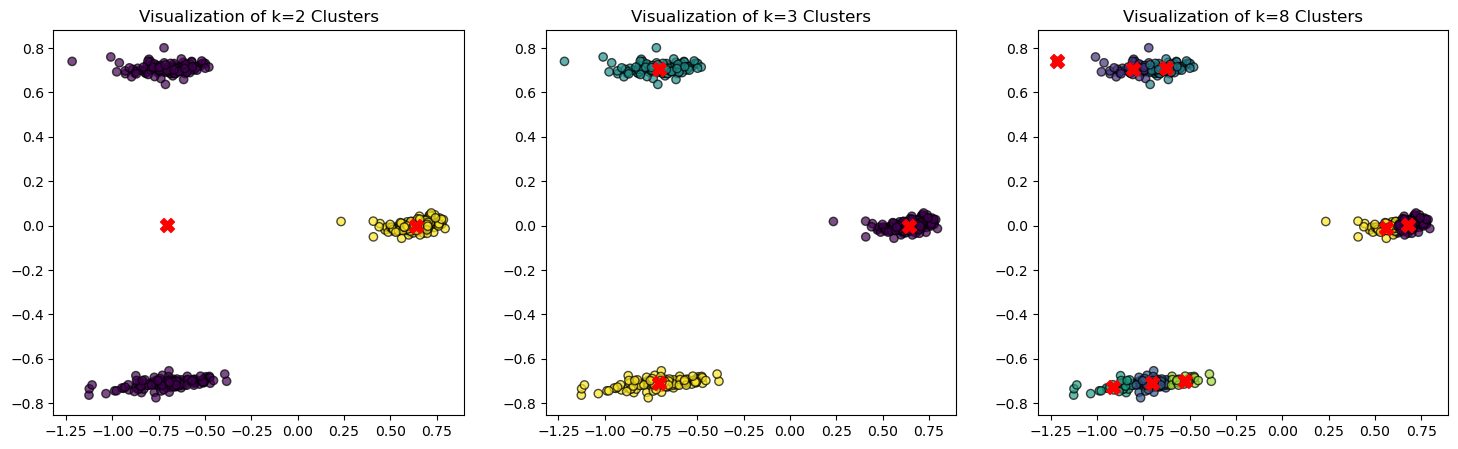

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X_pca' is your precomputed PCA data ready for clustering and visualization

# Selected k values to visualize
k_values = [2,3,8]

# Set up the plot
fig, axes = plt.subplots(1, len(k_values), figsize=(18, 5))  # Create a subplot for each selected k

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)  # Fitting the model to the PCA reduced data
    labels = kmeans.predict(X_pca)  # Predicting cluster labels on the same data

    # Scatter plot of the reduced data with color by cluster label
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Visualization of k={k} Clusters')
    # Optionally, plot centroids
    centroids = kmeans.cluster_centers_
    axes[i].scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X')  # Plot centroids

plt.show()

In [61]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

In [62]:
# Add the cluster labels to the DataFrame
aggregated_df['cluster'] = labels

In [63]:
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster
0,Aaron Cresswell,29,30,4,7,43,8,25,53,1,2,3,11,13,1980,0,53,40,57,8,82,103,1953,0,0,0,719,166,292,0,8,1,3,12,24,3,7,1284,11,4,1.177306,0.189796,0.670878,0.400430,0.008686,1.039314,DC,22,1.318182,1.363636,0.181818,0.318182,1.954545,0.363636,1.136364,2.409091,0.045455,0.090909,0.136364,0.500000,0.590909,90.0,0.0,2.409091,1.818182,2.590909,0.363636,3.727273,4.681818,88.772727,0.0,0.00,0.0,32.681818,7.545455,13.272727,0.0,0.363636,0.045455,0.136364,0.545455,1.090909,0.136364,0.318182,58.363636,0.500000,0.181818,0
1,Aaron Hughes,1,0,0,0,1,0,0,1,0,0,0,0,0,90,0,2,1,4,0,5,5,90,0,0,0,14,6,10,0,0,0,0,0,1,1,0,31,0,0,0.928571,0.311056,0.635338,0.238095,0.000000,0.699405,DR,1,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.0,0.0,2.000000,1.000000,4.000000,0.000000,5.000000,5.000000,90.000000,0.0,0.00,0.0,14.000000,6.000000,10.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1
2,Aaron Wan-Bissaka,8,10,0,0,19,4,5,15,3,9,0,1,2,630,0,32,33,29,2,15,11,628,0,0,0,160,46,102,0,0,0,0,7,18,0,0,412,3,1,0.986996,0.136083,0.648284,0.310637,0.000000,0.540063,DR,7,1.142857,1.428571,0.000000,0.000000,2.714286,0.571429,0.714286,2.142857,0.428571,1.285714,0.000000,0.142857,0.285714,90.0,0.0,4.571429,4.714286,4.142857,0.285714,2.142857,1.571429,89.714286,0.0,0.00,0.0,22.857143,6.571429,14.571429,0.0,0.000000,0.000000,0.000000,1.000000,2.571429,0.000000,0.000000,58.857143,0.428571,0.142857,1
3,Abdou Diallo,36,57,0,8,35,4,11,11,2,20,10,14,43,1800,2,82,93,52,1,70,78,1786,0,3,0,585,158,228,0,6,3,0,12,55,3,4,1111,5,5,1.169167,0.190235,0.640343,0.370597,0.008505,1.049119,DC,20,1.800000,2.850000,0.000000,0.400000,1.750000,0.200000,0.550000,0.550000,0.100000,1.000000,0.500000,0.700000,2.150000,90.0,0.1,4.100000,4.650000,2.600000,0.050000,3.500000,3.900000,89.300000,0.0,0.15,0.0,29.250000,7.900000,11.400000,0.0,0.300000,0.150000,0.000000,0.600000,2.750000,0.150000,0.200000,55.550000,0.250000,0.250000,0
4,Abdullahi Shehu,1,0,0,0,3,0,0,0,0,0,1,1,1,90,0,3,1,10,0,2,2,90,0,0,0,33,2,8,0,0,0,0,0,1,0,0,50,1,0,1.076923,0.137320,0.651584,0.352941,0.000000,1.714671,DR,1,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,90.0,0.0,3.000000,1.000000,10.000000,0.000000,2.000000,2.000000,90.000000,0.0,0.00,0.0,33.000000,2.000000,8.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,50.000000,1.000000,0.000000,1


In [64]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,1.318182,1.363636,0.181818,0.318182,1.954545,0.363636,1.136364,2.409091,0.045455,0.090909,0.136364,0.500000,0.590909,90.0,0.0,2.409091,1.818182,2.590909,0.363636,3.727273,4.681818,88.772727,0.0,0.00,0.0,32.681818,7.545455,13.272727,0.0,0.363636,0.045455,0.136364,0.545455,1.090909,0.136364,0.318182,58.363636,0.500000,0.181818,1.177306,0.189796,0.670878,0.400430,0.008686,1.039314,DC
1,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.0,0.0,2.000000,1.000000,4.000000,0.000000,5.000000,5.000000,90.000000,0.0,0.00,0.0,14.000000,6.000000,10.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.928571,0.311056,0.635338,0.238095,0.000000,0.699405,DR
2,1.142857,1.428571,0.000000,0.000000,2.714286,0.571429,0.714286,2.142857,0.428571,1.285714,0.000000,0.142857,0.285714,90.0,0.0,4.571429,4.714286,4.142857,0.285714,2.142857,1.571429,89.714286,0.0,0.00,0.0,22.857143,6.571429,14.571429,0.0,0.000000,0.000000,0.000000,1.000000,2.571429,0.000000,0.000000,58.857143,0.428571,0.142857,0.986996,0.136083,0.648284,0.310637,0.000000,0.540063,DR
3,1.800000,2.850000,0.000000,0.400000,1.750000,0.200000,0.550000,0.550000,0.100000,1.000000,0.500000,0.700000,2.150000,90.0,0.1,4.100000,4.650000,2.600000,0.050000,3.500000,3.900000,89.300000,0.0,0.15,0.0,29.250000,7.900000,11.400000,0.0,0.300000,0.150000,0.000000,0.600000,2.750000,0.150000,0.200000,55.550000,0.250000,0.250000,1.169167,0.190235,0.640343,0.370597,0.008505,1.049119,DC
4,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,90.0,0.0,3.000000,1.000000,10.000000,0.000000,2.000000,2.000000,90.000000,0.0,0.00,0.0,33.000000,2.000000,8.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,50.000000,1.000000,0.000000,1.076923,0.137320,0.651584,0.352941,0.000000,1.714671,DR


In [65]:
# Drop the 'pos_role' column from clustering_features
clustering_features = [col for col in clustering_features if col != 'pos_role']

# Calculate the average performance metrics for each cluster
cluster_performance = aggregated_df.groupby('cluster')[clustering_features].mean()

# Show the cluster performance DataFrame
print("Average performance metrics for each cluster:")
print(cluster_performance)

Average performance metrics for each cluster:
         average_aerials_l  average_aerials_w  average_assists  \
cluster                                                          
0                 1.645096           2.780571         0.020811   
1                 1.387526           1.467304         0.044241   
2                 1.299445           1.416939         0.043481   

         average_chances2score  average_clearances  average_countattack  \
cluster                                                                   
0                     0.263808            3.024766             0.446152   
1                     0.211673            1.806257             0.644886   
2                     0.250888            1.861267             0.631867   

         average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
cluster                                                                     
0                   0.107774               0.167604              0.119023   
1               

In [66]:
cluster_performance

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.645096,2.780571,0.020811,0.263808,3.024766,0.446152,0.107774,0.167604,0.119023,0.192736,0.053727,0.486302,0.874897,90.471784,0.038622,2.293551,2.222582,2.489986,0.067593,4.096080,2.846811,87.369245,0.000967,0.027730,0.008680,39.449493,5.505830,8.854965,0.006348,0.249806,0.116422,0.055116,0.602519,1.703235,0.087538,0.281233,58.139953,0.649397,0.165900,1.218833,0.182596,0.658172,0.377348,0.004162,0.979756
1,1.387526,1.467304,0.044241,0.211673,1.806257,0.644886,1.082005,1.984097,0.079118,0.555078,0.343522,0.622222,0.966776,90.568140,0.024906,3.749227,3.453688,2.894448,0.307427,2.809895,2.477054,86.997026,0.000640,0.062689,0.013686,33.214092,6.471233,12.461422,0.000667,0.253271,0.102788,0.095808,0.280210,1.630534,0.190435,0.365195,62.797368,0.981442,0.150184,1.235409,0.195614,0.688594,0.407076,0.004236,1.056401
2,1.299445,1.416939,0.043481,0.250888,1.861267,0.631867,0.996540,2.072917,0.124451,0.558584,0.344253,0.654536,0.916366,90.685941,0.016558,3.578523,3.351909,2.838123,0.285714,2.816648,2.468024,87.026971,0.001008,0.026879,0.004731,32.743972,6.317343,12.812698,0.001764,0.333979,0.086159,0.148952,0.247595,1.522253,0.155996,0.330293,62.046944,0.794159,0.145458,1.212876,0.194203,0.681710,0.405877,0.005094,0.952126


<Figure size 1400x1000 with 0 Axes>

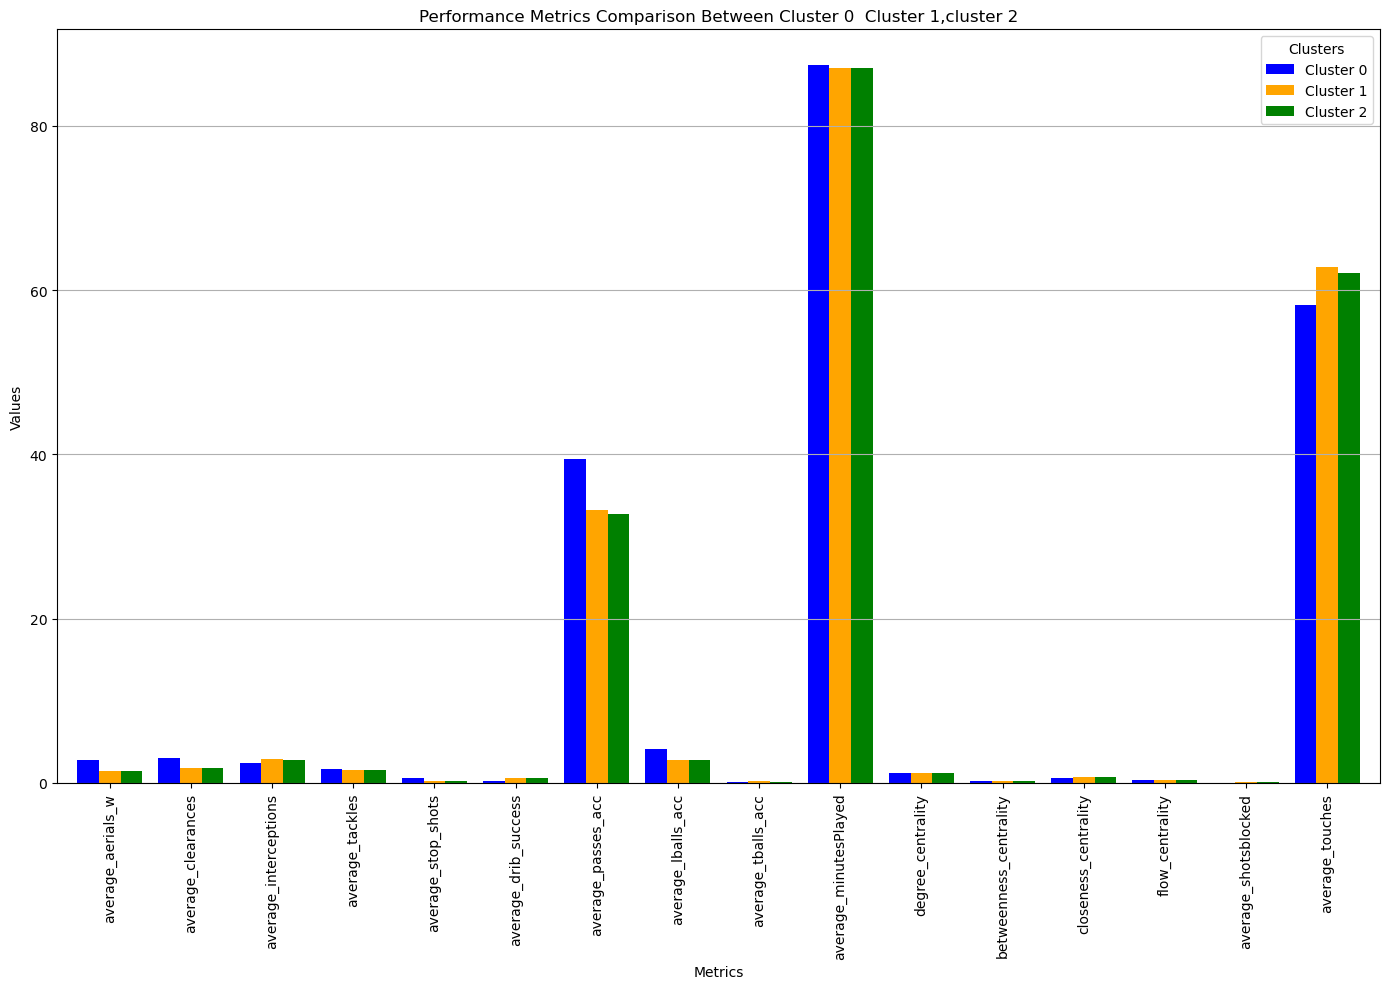

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cluster_performance' is your DataFrame
# Define the performance metrics
metrics = [
    'average_aerials_w',
'average_clearances',
'average_interceptions',
'average_tackles',
'average_stop_shots',
'average_drib_success',
'average_passes_acc',
'average_lballs_acc',
'average_tballs_acc',
'average_minutesPlayed',
'degree_centrality',
'betweenness_centrality',
'closeness_centrality',
'flow_centrality',
'average_shotsblocked',
'average_touches'
]

# Filter DataFrame to include only relevant metrics
df = cluster_performance[metrics]

# Transpose the DataFrame for better plotting
df_transposed = df.T
df_transposed.columns = ['Cluster 0', 'Cluster 1','Cluster 2']

# Plotting
plt.figure(figsize=(14, 10))
ax = df_transposed.plot(kind='bar', figsize=(14, 10), width=0.8, color=['blue', 'orange','green'])
plt.title('Performance Metrics Comparison Between Cluster 0  Cluster 1,cluster 2')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(title='Clusters')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Cluster 0 (Best performance overall in crucial defensive metrics)
Cluster 1 (Strong in distribution and involvement)
Cluster 2 (Balanced but not leading in key areas)

Report on Defender Clusters Based on Average Metrics
Introduction
This report analyzes the performance metrics of defenders in football, grouped into three distinct clusters. Each cluster represents a different style or role within the defensive line, based on various average metrics related to their defensive, passing, and attacking contributions.

Cluster 0: Traditional Central Defenders
Aerial Duels: Defenders in this cluster exhibit the highest involvement in aerial duels, with an average of 2.78 aerials won and 1.65 lost per game. This indicates that these players are likely central defenders who frequently engage in aerial challenges, especially in set-piece situations.

Clearances and Interceptions: With an average of 3.02 clearances and 2.49 interceptions per game, these defenders are crucial in clearing the ball from dangerous areas and intercepting opposition passes, which is typical of a central defender’s role.

Passing and Ball Distribution: These defenders play a significant role in building attacks from the back, as indicated by their average of 39.45 accurate passes and 4.10 accurate long balls per game. This suggests they are responsible for initiating plays and distributing the ball effectively.

Discipline: Players in this cluster demonstrate strong discipline, with the lowest averages in fouls (0.87) and red cards (0.006). This indicates that they are effective in their defensive duties without resorting to reckless challenges.

Cluster 1: Attacking-Oriented Full-Backs or Wing-Backs
Aerial Duels and Ground Duels: This group shows a lower involvement in aerial duels (1.39 lost, 1.47 won) compared to Cluster 0, which suggests these defenders might be more involved in ground duels and play in wider areas.

Crossing and Attacking Contributions: Cluster 1 defenders are highly involved in crossing, averaging 1.08 accurate crosses and 1.98 inaccurate crosses per game. This suggests they are likely full-backs or wing-backs who push forward to support the attack.

Dribbling and Offensive Play: With an average of 0.55 successful dribbles and 0.34 unsuccessful dribbles, these defenders are more adventurous in their play, often taking on opponents to create chances or relieve pressure.

Passing: These defenders contribute significantly to ball distribution with an average of 33.21 accurate passes and 2.81 accurate long balls per game, slightly lower than Cluster 0 but indicative of their involvement in transitioning play from defense to attack.

Discipline: The average metrics show slightly higher fouls (0.97) and yellow cards (0.19), suggesting these players might be more aggressive in their defensive approach.

Cluster 2: Balanced Wide Defenders
Aerial Duels and Ground Duels: Similar to Cluster 1, defenders in Cluster 2 are involved in fewer aerial duels (1.30 lost, 1.42 won), indicating a role that likely involves less aerial engagement and more focus on ground play.

Crossing: Like Cluster 1, these defenders are active in crossing, with averages of 0.99 accurate crosses and 2.07 inaccurate crosses per game. This aligns with the role of full-backs or wing-backs who frequently join the attack.

Clearances and Interceptions: These players average 1.86 clearances and 2.84 interceptions per game, similar to Cluster 1, suggesting a role that involves both defensive responsibilities and support in attacking plays.

Passing: The passing metrics (32.74 accurate passes and 2.82 accurate long balls per game) are comparable to Cluster 1, indicating a balanced role in both defense and attack.

Discipline: The disciplinary records in this cluster are similar to those in Cluster 1, with averages of 0.92 fouls and 0.19 yellow cards per game, indicating a comparable playing style and level of aggression.

Conclusion
This analysis highlights the diverse roles that defenders can play on the field. Cluster 0 defenders are likely traditional central defenders, heavily involved in aerial duels, clearances, and playmaking from the back. Cluster 1 and Cluster 2 defenders, on the other hand, are more similar, likely representing full-backs or wing-backs with a focus on crossing, dribbling, and supporting the attack, with Cluster 1 showing slightly more adventurous or aggressive tendencies. Understanding these differences can help in optimizing team strategies based on the strengths of each defender.

In [69]:
#using the test on the clusters from the train_val
player_test_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
20791,World Cup 2018,2018-06-27,"South Korea - Germany, 2 - 0",South Korea,DF,DR,Lee Yong,WhoScored,0,0,0,0,1,0,0,0,0,0,55,19,8,2,0,5,5,2,2,0,2,19,0,1,5,0,10,1,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1.142857,0.276261,0.603571,0.382979,0.000000,0.0000,1,0,0,90,90
7269,Premier League 2017-18,2017-11-18,"Manchester United - Newcastle United, 4 - 1",Manchester United,DF,DC,Chris Smalling,WhoScored,0,1,0,1,0,0,0,0,0,0,60,49,3,0,0,3,2,1,2,2,1,5,1,0,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.066667,0.123542,0.622222,0.297872,0.505755,0.0625,1,0,1,90,90
6478,Premier League 2017-18,2017-10-30,"Burnley - Newcastle United, 1 - 0",Burnley,DF,DC,James Tarkowski,WhoScored,0,0,0,1,0,0,1,0,0,1,57,35,6,0,0,5,2,3,3,8,4,6,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1.384615,0.158620,0.692308,0.319444,1.167126,0.0000,1,0,1,90,90
13723,Premier League 2017-18,2018-02-10,"Manchester City - Leicester, 5 - 1",Leicester,DF,DC,Aleksandar Dragovic,WhoScored,0,0,0,0,0,0,0,0,0,0,32,16,4,0,0,0,0,1,2,1,0,5,0,1,3,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.600000,0.103215,0.522667,0.207547,0.000000,0.0000,0,1,0,90,90
19574,Premier League 2017-18,2018-05-13,"Tottenham - Leicester, 5 - 4",Leicester,DF,DR,Danny Simpson,WhoScored,0,0,0,0,0,0,0,0,0,0,25,7,8,0,0,2,4,0,2,1,2,10,1,1,4,1,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0.571429,0.116167,0.524845,0.131148,0.000000,0.0000,0,1,0,56,90


In [70]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','competition','goals_ag_otb',
'goals_ag_itb',
'saves_itb',
'saves_otb',
'saved_pen'
]

# Remove specified columns from the DataFrame
player_test_clustering= player_test_clustering.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test_clustering.head())

            date pos_role               player  goals  assists  \
20791 2018-06-27       DR             Lee Yong      0        0   
7269  2017-11-18       DC       Chris Smalling      1        0   
6478  2017-10-30       DC      James Tarkowski      0        0   
13723 2018-02-10       DC  Aleksandar Dragovic      0        0   
19574 2018-05-13       DR        Danny Simpson      0        0   

       shots_ontarget  shots_offtarget  shotsblocked  chances2score  \
20791               0                1             0              0   
7269                1                0             0              0   
6478                1                0             0              1   
13723               0                0             0              0   
19574               0                0             0              0   

       drib_success  drib_unsuccess  keypasses  touches  passes_acc  \
20791             0               0          0       55          19   
7269              0               

In [71]:
player_test_clustering.shape

(1180, 48)

In [72]:
# Select columns relevant to player performance metrics, excluding 'date' and 'player'
metric_columns = player_test_clustering.columns.difference(['date', 'player','pos_role'])

# Identify network metrics columns
network_metrics_columns = [
    'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals','flow_success']

# Identify performance metric columns (excluding network metrics)
performance_metric_columns = metric_columns.difference(network_metrics_columns)

# Display the selected columns
print("Performance metric columns:")
print(performance_metric_columns)
print("Network metric columns:")
print(network_metrics_columns)

Performance metric columns:
Index(['aerials_l', 'aerials_w', 'assists', 'chances2score', 'clearances',
       'countattack', 'crosses_acc', 'crosses_inacc', 'dangmistakes',
       'drib_success', 'drib_unsuccess', 'dribbled_past', 'fouls',
       'game_duration', 'goals', 'grduels_l', 'grduels_w', 'interceptions',
       'keypasses', 'lballs_acc', 'lballs_inacc', 'minutesPlayed',
       'missed_penalties', 'offsides', 'owngoals', 'passes_acc',
       'passes_inacc', 'poss_lost', 'rcards', 'shots_offtarget',
       'shots_ontarget', 'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc',
       'tballs_inacc', 'touches', 'wasfouled', 'ycards'],
      dtype='object')
Network metric columns:
['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals', 'flow_success']


In [73]:
import pandas as pd

# Assuming player_train_val_clustering is the DataFrame with your data

# Aggregate performance metrics for each player by summing up the values
aggregated_df = player_test_clustering.groupby('player')[performance_metric_columns].sum().reset_index()

# Aggregate network metrics for each player by averaging the values
network_aggregated_df = player_test_clustering.groupby('player')[network_metrics_columns].mean().reset_index()

# Get the first 'pos' role for each player
pos_role_df = player_test_clustering.groupby('player')['pos_role'].first().reset_index()

# Merge aggregated performance metrics, network metrics, and pos role
aggregated_df = pd.merge(aggregated_df, network_aggregated_df, on='player')
aggregated_df = pd.merge(aggregated_df, pos_role_df, on='player')

# Calculate the number of matches played by each player
aggregated_df['matches_played'] = player_test_clustering.groupby('player')['date'].count().values

print("Aggregated performance, network metrics, and pos role for each player:")
print(aggregated_df.head())

Aggregated performance, network metrics, and pos role for each player:
            player  aerials_l  aerials_w  assists  chances2score  clearances  \
0  Aaron Cresswell          4          9        2              3           2   
1     Aaron Hughes          2          1        0              0           4   
2     Abdou Diallo          8         23        0              3          14   
3    Achraf Hakimi          0          2        0              0           1   
4       Adam Smith          6          3        0              1           6   

   countattack  crosses_acc  crosses_inacc  dangmistakes  drib_success  \
0            2           10              8             0             1   
1            1            0              0             0             0   
2            6            4              2             0             9   
3            0            0              2             0             2   
4            1            3              9             1             2   

   

In [74]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
aggregated_df.head(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played
0,Aaron Cresswell,4,9,2,3,2,2,10,8,0,1,0,1,3,360,0,8,8,7,0,17,17,346,0,1,0,126,31,46,0,1,1,0,0,8,0,0,227,2,2,1.171245,0.151804,0.626419,0.345471,0.008333,0.794663,DC,4
1,Aaron Hughes,2,1,0,0,4,1,0,0,0,0,0,0,0,90,0,2,2,5,0,1,2,90,0,0,0,9,4,10,0,0,0,0,0,2,0,1,28,0,0,0.642857,0.093272,0.454887,0.250000,0.000000,0.000000,DR,1
2,Abdou Diallo,8,23,0,3,14,6,4,2,0,9,2,3,11,540,0,19,29,12,0,36,22,540,0,0,0,229,37,55,0,2,0,1,2,19,2,1,386,3,0,1.255556,0.261597,0.658366,0.414090,0.000000,0.873042,DC,6
3,Achraf Hakimi,0,2,0,0,1,0,0,2,0,2,1,0,1,90,0,3,5,2,0,1,5,90,0,0,0,32,10,13,0,0,0,0,0,3,0,2,67,0,0,1.285714,0.196349,0.754464,0.394231,0.000000,0.850840,DL,1
4,Adam Smith,6,3,0,1,6,1,3,9,1,2,3,2,1,540,0,18,20,22,2,9,19,507,0,0,0,242,46,73,0,1,0,0,0,9,0,3,415,8,1,1.088889,0.168630,0.653842,0.413836,0.012994,1.134367,DR,6
5,Adil Rami,5,9,0,0,8,1,0,0,0,2,0,0,3,180,0,2,7,4,0,5,11,180,0,0,0,72,12,17,0,0,0,0,1,2,0,0,115,3,2,1.384615,0.191222,0.695023,0.332579,0.033333,0.820143,DC,2
6,Adrian Mariappa,15,29,0,0,12,1,0,0,0,0,0,3,6,540,0,15,5,18,0,16,12,479,0,0,0,139,24,34,0,0,0,0,3,6,0,0,241,5,0,0.978571,0.155688,0.587492,0.258693,0.000000,0.815965,DC,6
7,Ahmed Fathy,2,0,0,1,6,5,3,4,1,1,1,7,5,180,0,17,7,4,1,5,3,180,0,0,0,63,11,30,0,0,1,0,0,8,0,0,132,0,1,1.250000,0.180283,0.690359,0.485766,0.000000,0.513674,DR,2
8,Ahmed Hegazi,18,33,0,0,28,6,1,3,0,1,2,9,7,900,1,28,30,15,1,55,44,900,0,0,0,237,64,91,0,0,1,0,7,21,0,2,436,5,1,1.078352,0.188583,0.588557,0.277620,0.000000,0.572685,DC,10
9,Alberto Moreno,0,1,0,0,2,0,1,1,0,0,0,0,0,90,0,2,4,1,1,2,3,90,0,0,0,61,7,14,0,1,0,1,0,2,0,0,90,2,0,1.785714,0.295926,0.862245,0.526316,0.000000,1.134454,DL,1


In [75]:
# Assuming 'pos_encoded' is the column name for the encoded pos role
# Exclude 'pos_encoded' from the averaging process but still include it in clustering
performance_metric_columns_for_averaging = [col for col in performance_metric_columns if col != 'pos_role']

# Calculate the average performance metrics for each player, excluding 'pos_encoded'
for column in performance_metric_columns_for_averaging:
    aggregated_df[f'average_{column}'] = aggregated_df[column] / aggregated_df['matches_played']

# Select only the average metrics for clustering, plus 'pos_encoded'
average_performance_columns = [f'average_{column}' for column in performance_metric_columns_for_averaging]

# Combine average performance metrics, network metrics, and 'pos_encoded' for clustering
clustering_features = average_performance_columns + network_metrics_columns + ['pos_role']

print("Aggregated DataFrame with average performance metrics, network metrics, and pos role:")
print(aggregated_df[['player'] + clustering_features])

Aggregated DataFrame with average performance metrics, network metrics, and pos role:
                      player  average_aerials_l  average_aerials_w  \
0            Aaron Cresswell           1.000000           2.250000   
1               Aaron Hughes           2.000000           1.000000   
2               Abdou Diallo           1.333333           3.833333   
3              Achraf Hakimi           0.000000           2.000000   
4                 Adam Smith           1.000000           0.500000   
5                  Adil Rami           2.500000           4.500000   
6            Adrian Mariappa           2.500000           4.833333   
7                Ahmed Fathy           1.000000           0.000000   
8               Ahmed Hegazi           1.800000           3.300000   
9             Alberto Moreno           0.000000           1.000000   
10       Aleksandar Dragovic           0.000000           1.000000   
11            Alexander Hack           3.000000           5.500000   
12  

In [76]:
# Select features for clustering
features = aggregated_df[clustering_features]

In [77]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role
0,1.000000,2.250000,0.5,0.750000,0.500000,0.500000,2.500000,2.000000,0.000000,0.250000,0.000000,0.250000,0.750000,90.0,0.0,2.000000,2.000000,1.750000,0.000000,4.25,4.250000,86.5,0.0,0.25,0.0,31.500000,7.750000,11.500000,0.0,0.250000,0.25,0.000000,0.000000,2.000000,0.000000,0.000000,56.750000,0.500000,0.500000,1.171245,0.151804,0.626419,0.345471,0.008333,0.794663,DC
1,2.000000,1.000000,0.0,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.0,0.0,2.000000,2.000000,5.000000,0.000000,1.00,2.000000,90.0,0.0,0.00,0.0,9.000000,4.000000,10.000000,0.0,0.000000,0.00,0.000000,0.000000,2.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.642857,0.093272,0.454887,0.250000,0.000000,0.000000,DR
2,1.333333,3.833333,0.0,0.500000,2.333333,1.000000,0.666667,0.333333,0.000000,1.500000,0.333333,0.500000,1.833333,90.0,0.0,3.166667,4.833333,2.000000,0.000000,6.00,3.666667,90.0,0.0,0.00,0.0,38.166667,6.166667,9.166667,0.0,0.333333,0.00,0.166667,0.333333,3.166667,0.333333,0.166667,64.333333,0.500000,0.000000,1.255556,0.261597,0.658366,0.414090,0.000000,0.873042,DC
3,0.000000,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,90.0,0.0,3.000000,5.000000,2.000000,0.000000,1.00,5.000000,90.0,0.0,0.00,0.0,32.000000,10.000000,13.000000,0.0,0.000000,0.00,0.000000,0.000000,3.000000,0.000000,2.000000,67.000000,0.000000,0.000000,1.285714,0.196349,0.754464,0.394231,0.000000,0.850840,DL
4,1.000000,0.500000,0.0,0.166667,1.000000,0.166667,0.500000,1.500000,0.166667,0.333333,0.500000,0.333333,0.166667,90.0,0.0,3.000000,3.333333,3.666667,0.333333,1.50,3.166667,84.5,0.0,0.00,0.0,40.333333,7.666667,12.166667,0.0,0.166667,0.00,0.000000,0.000000,1.500000,0.000000,0.500000,69.166667,1.333333,0.166667,1.088889,0.168630,0.653842,0.413836,0.012994,1.134367,DR


In [78]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-hot encode 'pos_role'
one_hot_encoder = OneHotEncoder(sparse_output=False)
pos_role_encoded = one_hot_encoder.fit_transform(features[['pos_role']])

# Create a DataFrame with the encoded 'pos_role'
pos_role_encoded_df = pd.DataFrame(pos_role_encoded, columns=one_hot_encoder.get_feature_names_out(['pos_role']))

# Drop the original 'pos_role' column from the features DataFrame
features_without_pos_role = features.drop(columns=['pos_role'])

# Apply Min-Max scaling to the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_without_pos_role)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_without_pos_role.columns)

# Combine the scaled features with the one-hot encoded 'pos_role'
features_scaled = pd.concat([scaled_features_df, pos_role_encoded_df], axis=1)

# Show the final DataFrame with scaled features and one-hot encoded 'pos_role'
print("Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':")
print(features_scaled.head())

Final DataFrame with Min-Max scaled features and one-hot encoded 'pos_role':
   average_aerials_l  average_aerials_w  average_assists  \
0           0.111111           0.281250              0.5   
1           0.222222           0.125000              0.0   
2           0.148148           0.479167              0.0   
3           0.000000           0.250000              0.0   
4           0.111111           0.062500              0.0   

   average_chances2score  average_clearances  average_countattack  \
0               0.187500            0.050000             0.125000   
1               0.000000            0.400000             0.250000   
2               0.125000            0.233333             0.250000   
3               0.000000            0.100000             0.000000   
4               0.041667            0.100000             0.041667   

   average_crosses_acc  average_crosses_inacc  average_dangmistakes  \
0             0.500000               0.222222              0.000000   
1    

In [79]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components as needed
X_pca = pca.fit_transform(features_scaled)

print("\nPCA-transformed DataFrame:")
print(X_pca)


PCA-transformed DataFrame:
[[ 4.00115086e-01 -9.00377772e-03]
 [-5.46510549e-01 -7.70724366e-01]
 [ 5.00880865e-01  3.84886825e-02]
 [-7.21807686e-01  7.90405431e-01]
 [-7.67564558e-01 -6.40161677e-01]
 [ 5.86150935e-01 -4.19731501e-02]
 [ 6.81055829e-01 -8.33191306e-02]
 [-8.86119809e-01 -6.45995099e-01]
 [ 6.21643301e-01 -4.68933410e-02]
 [-7.70169261e-01  8.74756634e-01]
 [ 6.14143012e-01 -1.07954783e-01]
 [ 5.77715630e-01  5.75518264e-02]
 [ 6.41943103e-01 -3.71234354e-03]
 [ 5.31959763e-01 -7.80003817e-02]
 [-5.62390410e-01  7.17606718e-01]
 [-9.89883937e-01 -6.17449036e-01]
 [ 6.10674091e-01 -1.05918726e-02]
 [ 7.30594432e-01 -7.28489631e-02]
 [-7.76267915e-01  8.27585534e-01]
 [-7.44957077e-01 -6.08152986e-01]
 [ 6.61866988e-01 -7.48791459e-02]
 [-5.53189819e-01  6.81095012e-01]
 [ 5.40334540e-01  4.79669412e-02]
 [-8.12343242e-01 -6.47386332e-01]
 [ 6.32005420e-01 -4.48317383e-02]
 [-7.76615821e-01  8.26715137e-01]
 [ 6.91409112e-01 -5.77036776e-02]
 [-8.52326699e-01  7.868321

In [80]:
kmeans

KMeans(n_clusters=3)

In [81]:
import numpy as np

# Fit the KMeans model (if not already fitted) and get the cluster centers
cluster_labels = kmeans.predict(X_pca)
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
aggregated_df['cluster'] = cluster_labels

# Calculate the distance of each player to the cluster centroid
distances = []
for i, row in aggregated_df.iterrows():
    cluster = row['cluster']
    centroid = centroids[cluster]
    player_features = X_pca[i]
    distance = np.linalg.norm(player_features - centroid)
    distances.append(distance)

aggregated_df['distance_to_centroid'] = distances

# Sort players within each cluster based on their distance to the centroid
aggregated_df['rank_within_cluster'] = aggregated_df.groupby('cluster')['distance_to_centroid'].rank()

# Sort the players based on cluster rank and distance to centroid
sorted_players = aggregated_df.sort_values(by=['rank_within_cluster', 'player'])

# Display the sorted players
print("Sorted players by cluster performance and distance to centroid:")
print(sorted_players[['player', 'cluster', 'distance_to_centroid', 'rank_within_cluster']])

Sorted players by cluster performance and distance to centroid:
                      player  cluster  distance_to_centroid  \
12              Alfie Mawson        0              0.003315   
238            Martin Olsson        2              0.030005   
352         Timothy Chandler        1              0.005497   
83            DeAndre Yedlin        1              0.009347   
318               Salif Sane        0              0.009309   
366                  Wendell        2              0.035825   
122          Gian-Luca Itter        2              0.036424   
137           Igor Smolnikov        1              0.019573   
225             Manuel Gulde        0              0.009537   
151       Jannik Vestergaard        0              0.010128   
176             Jose Holebas        2              0.036948   
376         Yohan Benalouane        1              0.033574   
85              Dejan Lovren        0              0.011041   
156            Jeremy Toljan        1              0.0

In [82]:
cluster_1_players = sorted_players[sorted_players['cluster'] == 1]
cluster_0_players = sorted_players[sorted_players['cluster'] == 0]
cluster_2_players = sorted_players[sorted_players['cluster'] == 2]

In [83]:
cluster_1_players.head(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster,distance_to_centroid,rank_within_cluster
352,Timothy Chandler,2,1,0,1,1,0,3,2,1,0,1,0,2,180,0,1,5,5,1,4,2,155,0,1,0,44,8,16,0,1,0,0,0,2,0,1,82,4,0,0.933333,0.112361,0.601727,0.281373,0.000000,0.813847,DR,2,1.000000,0.50,0.000000,0.500000,0.500000,0.000000,1.500000,1.000000,0.5,0.000000,0.500000,0.000000,1.000000,90.0,0.00,0.500000,2.500000,2.500000,0.500000,2.000000,1.000000,77.500000,0.0,0.500000,0.0,22.000000,4.000000,8.000000,0.0,0.500000,0.00,0.000000,0.000000,1.000000,0.0,0.500000,41.000000,2.000000,0.000000,1,0.005497,1.0
83,DeAndre Yedlin,7,7,0,0,12,6,7,7,0,6,2,2,8,630,0,32,16,19,1,15,15,630,0,2,0,152,37,58,0,0,0,0,1,5,0,1,326,7,2,1.019048,0.181378,0.620664,0.297651,0.000000,0.535542,DR,7,1.000000,1.00,0.000000,0.000000,1.714286,0.857143,1.000000,1.000000,0.0,0.857143,0.285714,0.285714,1.142857,90.0,0.00,4.571429,2.285714,2.714286,0.142857,2.142857,2.142857,90.000000,0.0,0.285714,0.0,21.714286,5.285714,8.285714,0.0,0.000000,0.00,0.000000,0.142857,0.714286,0.0,0.142857,46.571429,1.000000,0.285714,1,0.009347,2.0
137,Igor Smolnikov,1,0,0,0,0,0,0,1,0,0,0,1,3,90,0,7,1,2,0,2,3,90,0,0,0,30,3,4,0,0,0,0,0,0,0,1,39,2,0,1.384615,0.254535,0.692308,0.328125,0.000000,0.000000,DR,1,1.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,3.000000,90.0,0.00,7.000000,1.000000,2.000000,0.000000,2.000000,3.000000,90.000000,0.0,0.000000,0.0,30.000000,3.000000,4.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,1.000000,39.000000,2.000000,0.000000,1,0.019573,3.0
376,Yohan Benalouane,2,3,0,1,3,0,0,3,0,0,0,1,1,90,0,9,2,2,0,2,4,90,0,1,0,19,6,14,0,1,1,1,1,0,0,0,49,1,0,1.333333,0.232046,0.768627,0.325000,0.000000,0.738261,DR,1,2.000000,3.00,0.000000,1.000000,3.000000,0.000000,0.000000,3.000000,0.0,0.000000,0.000000,1.000000,1.000000,90.0,0.00,9.000000,2.000000,2.000000,0.000000,2.000000,4.000000,90.000000,0.0,1.000000,0.0,19.000000,6.000000,14.000000,0.0,1.000000,1.00,1.000000,1.000000,0.000000,0.0,0.000000,49.000000,1.000000,0.000000,1,0.033574,4.0
156,Jeremy Toljan,4,3,0,0,3,0,0,1,0,1,1,1,2,270,0,8,8,9,0,2,5,226,0,1,0,100,16,30,0,0,0,0,0,5,0,1,172,6,0,1.004762,0.107691,0.637846,0.331512,0.000000,1.177758,DR,3,1.333333,1.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.0,0.333333,0.333333,0.333333,0.666667,90.0,0.00,2.666667,2.666667,3.000000,0.000000,0.666667,1.666667,75.333333,0.0,0.333333,0.0,33.333333,5.333333,10.000000,0.0,0.000000,0.00,0.000000,0.000000,1.666667,0.0,0.333333,57.333333,2.000000,0.000000,1,0.035607,5.0
288,Paul Verhaegh,2,2,0,0,2,0,3,2,0,1,0,1,2,180,0,3,2,6,0,3,2,106,0,0,0,36,10,14,0,0,0,0,0,1,0,0,70,0,0,0.991667,0.093383,0.657089,0.241158,0.000000

In [84]:
cluster_0_players.tail(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,minutesPlayed,missed_penalties,offsides,owngoals,passes_acc,passes_inacc,poss_lost,rcards,shots_offtarget,shots_ontarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,flow_success,pos_role,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_minutesPlayed,average_missed_penalties,average_offsides,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_rcards,average_shots_offtarget,average_shots_ontarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster,distance_to_centroid,rank_within_cluster
329,Sergio Ramos,5,4,0,1,1,0,0,0,0,0,0,0,1,90,0,1,2,3,1,5,3,90,0,0,0,89,5,8,0,1,0,1,0,2,0,1,105,1,0,1.642857,0.187732,0.754464,0.581395,0.000000,1.123899,DC,1,5.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,90.0,0.000,1.000000,2.000000,3.000000,1.000000,5.000000,3.000000,90.000000,0.0,0.00,0.0,89.000000,5.000000,8.000000,0.0,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,105.000000,1.000000,0.000000,0,0.158662,191.0
152,Javi Martinez,2,2,0,1,4,0,0,0,0,0,0,0,0,90,0,0,1,6,1,4,3,90,0,0,0,87,3,9,0,1,0,1,0,1,0,1,101,0,0,1.533333,0.209185,0.768627,0.520833,0.000000,1.190011,DC,1,2.000000,2.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,90.0,0.000,0.000000,1.000000,6.000000,1.000000,4.000000,3.000000,90.000000,0.0,0.00,0.0,87.000000,3.000000,9.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,101.000000,0.000000,0.000000,0,0.159099,192.0
267,Nacho Monreal,14,19,0,2,8,3,4,6,2,1,0,4,4,450,1,16,8,22,1,7,8,450,0,1,0,331,21,40,0,1,2,1,0,12,0,0,437,1,1,1.362857,0.206587,0.712661,0.491166,0.008696,1.895273,DC,5,2.800000,3.800000,0.000000,0.400000,1.600000,0.600000,0.800000,1.200000,0.400,0.200000,0.000000,0.800000,0.800000,90.0,0.200,3.200000,1.600000,4.400000,0.200000,1.400000,1.600000,90.000000,0.0,0.20,0.0,66.200000,4.200000,8.000000,0.0,0.200000,0.400000,0.200000,0.000000,2.400000,0.000000,0.000000,87.400000,0.200000,0.200000,0,0.160027,193.0
263,Molla Wague,1,6,0,0,4,0,1,0,0,0,0,0,0,90,1,0,0,3,0,4,4,90,0,0,0,13,7,9,0,0,1,0,0,1,0,0,38,1,0,0.933333,0.151554,0.544444,0.159574,0.000000,0.000000,DC,1,1.000000,6.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,90.0,1.000,0.000000,0.000000,3.000000,0.000000,4.000000,4.000000,90.000000,0.0,0.00,0.0,13.000000,7.000000,9.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,38.000000,1.000000,0.000000,0,0.160622,194.0
40,Benjamin Stambouli,8,20,0,0,17,7,0,1,3,3,2,11,17,720,0,31,30,43,1,51,26,694,0,0,0,404,62,89,0,0,0,0,0,26,1,4,584,6,1,1.247024,0.228899,0.671846,0.461206,0.002976,0.749475,DC,8,1.000000,2.500000,0.000000,0.000000,2.125000,0.875000,0.000000,0.125000,0.375,0.375000,0.250000,1.375000,2.125000,90.0,0.000,3.875000,3.750000,5.375000,0.125000,6.375000,3.250000,86.750000,0.0,0.00,0.0,50.500000,7.750000,11.125000,0.0,0.000000,0.000000,0.000000,0.000000,3.250000,0.125000,0.500000,73.000000,0.750000,0.125000,0,0.162816,195.0
287,Paul Jaeckel,0,2,0,0,1,0,0,1,0,0,0,2,3,90,0,6,1,6,0,2,4,90,0,0,0,33,7,9,